<a href="https://colab.research.google.com/github/gmrammohan15/EVA4/blob/master/S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/S9-Assignment/')
!ls /content/gdrive/My\ Drive/S9-Assignment

data		    grad_cam.py       Models	     resnet.py
dataloader.py	    __init__.py       __pycache__    S8_Assignment.ipynb
data_transforms.py  lr_finder.py      QuizDNN.ipynb  S9.ipynb
eval.py		    misclassified.py  README.md      Transforms_Albumentations


In [3]:
%cd /content/gdrive/My Drive/S9-Assignment/

/content/gdrive/My Drive/S9-Assignment


In [4]:
!ls

data		    grad_cam.py       Models	     resnet.py
dataloader.py	    __init__.py       __pycache__    S8_Assignment.ipynb
data_transforms.py  lr_finder.py      QuizDNN.ipynb  S9.ipynb
eval.py		    misclassified.py  README.md      Transforms_Albumentations


In [5]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
!pip install albumentations

     |████████████████████████████████| 634kB 2.6MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=e627559ee3610f5bec0f65958b6d0b8da1e6a8a2bb83218fe5a88d1968bba662
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [6]:
from Transforms_Albumentations import transform

import importlib
importlib.reload(transform)

#from transform  import Data
data = transform.Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
show_trainloader = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
show_testloader = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


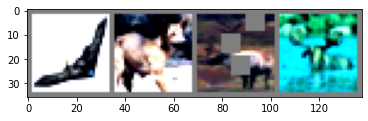

In [7]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(show_trainloader)
pics, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(pics))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
#from models import resnet
from Models import resnet

import torch

import importlib
importlib.reload(resnet)


model = resnet.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
print(model.device)
model = model.to(model.device)
model.summary((3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


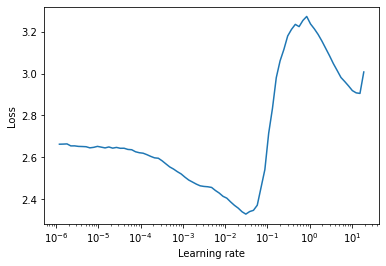

In [10]:

from lr_finder import LRFinder

import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.lr_scheduler import StepLR


EPOCHS = 5
l2_loss = 0.0001
l1_lambda = 0
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, nesterov=True, weight_decay=l2_loss)
lr_finder = LRFinder(model, optimizer, criterion, device=model.device)
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()
#schedular = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(trainloader), epochs=EPOCHS)


#model.evaluate(optimizer, trainloader, testloader, EPOCHS, criterion, schedular, True, l1_lambda)

In [11]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
print(min(loss))
print(lr[loss.index(min(loss))])
optimizer = optim.SGD(model.parameters(), lr=lr[loss.index(min(loss))], momentum=0.9, nesterov=True, weight_decay=l2_loss)

2.3273602993118607
0.030902954325135894


In [12]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

schedular = ReduceLROnPlateau(optimizer, min_lr=1e-7, patience = 4)
model.evaluate(optimizer, trainloader, testloader, EPOCHS, criterion, schedular, True, l1_lambda)


Epoch= 0 Loss=0.9796463251113892 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 0, Train Accuracy: 78.75 , Test Accuracy: 61.63


Epoch= 1 Loss=0.9882712364196777 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1, Train Accuracy: 83.75 , Test Accuracy: 69.58


Epoch= 2 Loss=0.5561763644218445 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2, Train Accuracy: 93.75 , Test Accuracy: 76.17


Epoch= 3 Loss=0.5275605320930481 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [03:50<00:00,  1.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3, Train Accuracy: 88.75 , Test Accuracy: 77.56


Epoch= 4 Loss=0.5479751825332642 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [03:51<00:00,  1.69it/s]
100%|██████████| 79/79 [00:07<00:00, 10.81it/s]

Epoch 4, Train Accuracy: 95.0 , Test Accuracy: 78.19


Files already downloaded and verified


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([8, 8])
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>
<class 'torch.Tensor'>


<class 'torch.Tensor'>


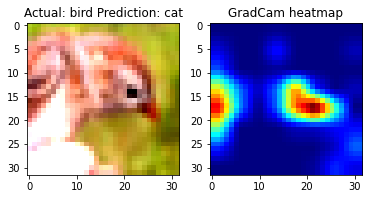

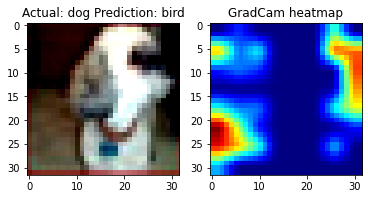

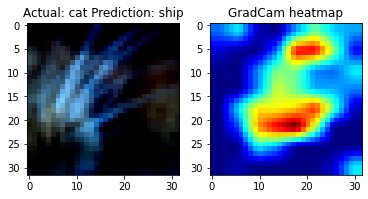

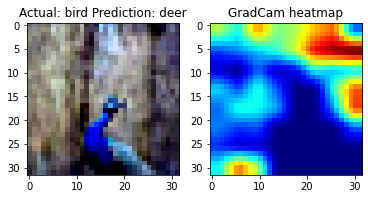

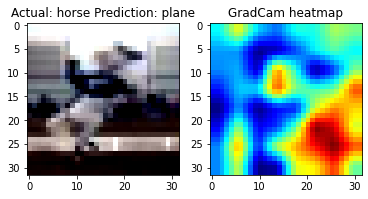

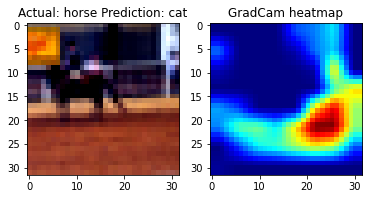

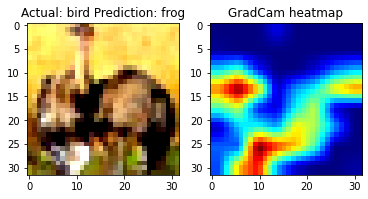

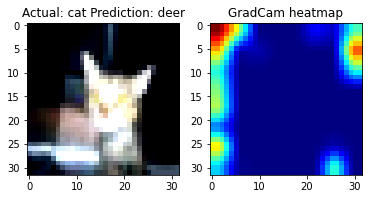

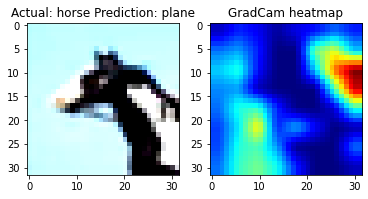

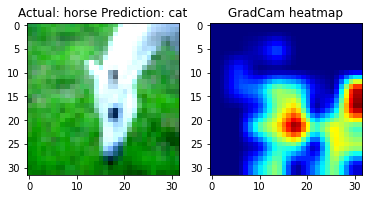

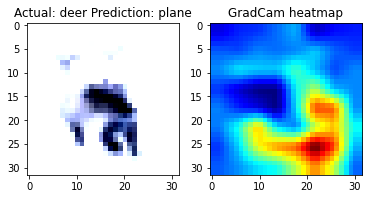

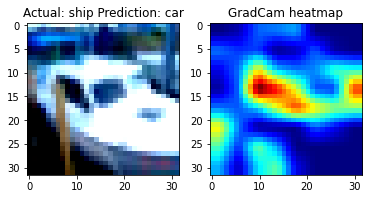

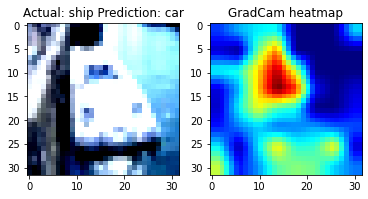

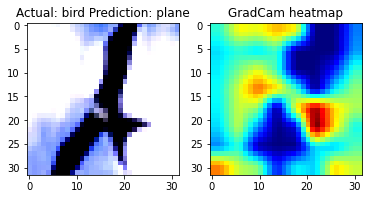

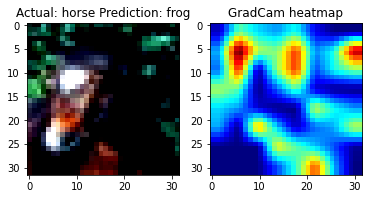

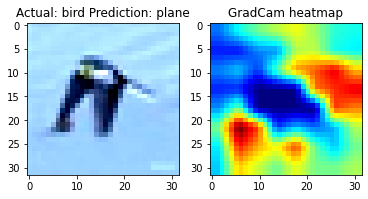

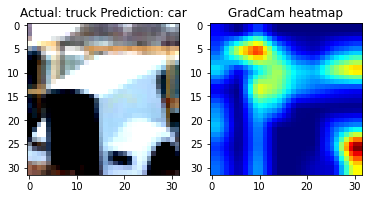

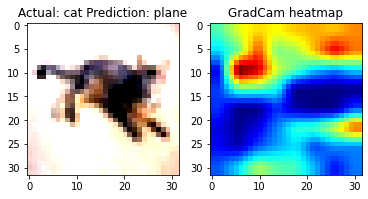

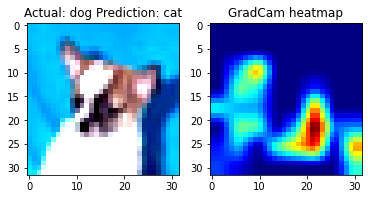

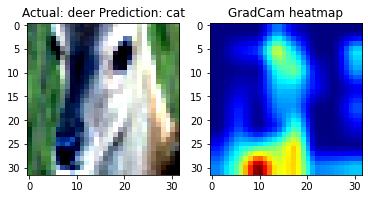

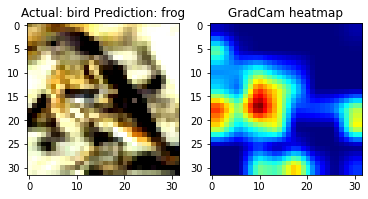

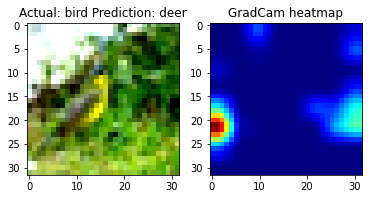

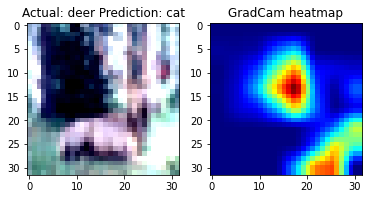

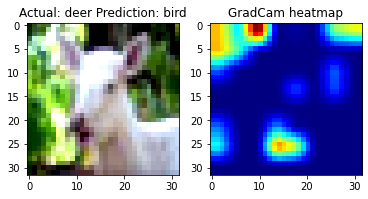

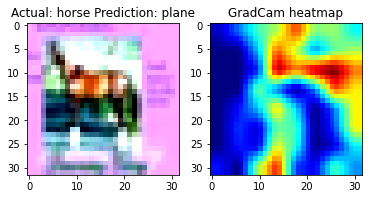

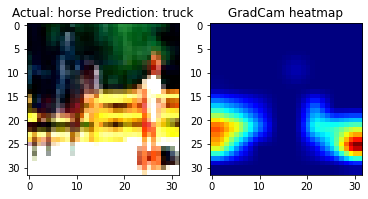

In [42]:
import cv2
import numpy as np
import torch
from torchvision.utils import make_grid
import torch.nn.functional as F

def visualize_cam(mask, img):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask.squeeze()), cv2.COLORMAP_JET)
    heatmap = torch.from_numpy(heatmap).permute(2, 0, 1).float().div(255)
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b])
    print(type(heatmap))
    result = heatmap+img
    result = result.div(result.max()).squeeze()
    
    return heatmap, result

testset =  data.getTestDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)

dataiter = iter(testloader2)
pic, labels = dataiter.next()
#print(model.layer4)
from grad_cam import GradCAM

resnet_dict = dict(type='resnet', arch=model, target_layer=model.layer3, input_size=(32, 32))
gradcam = GradCAM(resnet_dict, True)


index = 0
while(index <= 25):
    images, labels = dataiter.next()
    output = model(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] != classes[labels]):
      fig, axes = plt.subplots(nrows=1, ncols=2)
      mask, _ = gradcam(images.to(model.device))
      mask = mask.cpu()

      axes[0].set_title("Actual: "+str(classes[labels])+" , Prediction: "+str(classes[pred]))
      axes[1].set_title("GradCam heatmap")

      images = torchvision.utils.make_grid(images)
      heatmap, result = visualize_cam(mask.numpy(), images.numpy())

      axes[1].imshow(np.transpose(heatmap, (1, 2, 0)))
      im = torchvision.utils.make_grid(images)
      im = im / 2 + 0.5     # unnormalize
      img = im.numpy()
      axes[0].imshow(np.transpose(img, (1, 2, 0)))

      index=index+1
